В отдел лазерных технологий была направлена задача отработать технологию ферезровки нержавеющий стали импульсным лазерным излучением. Были проведены эксперименты. Входные параметры - Мощность лазера, скорость сканирования луча, Длительность импульса, количество проходов (слоев), на выходе измеряется глубина фрезеровки и  шероховатости поверхности (Ra, Rz). Созданные прогнозные модели помогут проверить промежуточные входные параметры, не проводя реальных физических экспериментов.

In [4]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVR
from sklearn.


import pickle

In [5]:
from sklearn.decomposition import PCA

##Загрузка и предобработка данных

In [84]:
df=pd.read_excel('/content/DATA_F.xlsx')

In [86]:
df.columns

Index(['Мощность, %', 'Мощность P [Вт]', 'Частота [kHz]', 'Скорость, мм/с',
       'Энергия в импульсе E [мДж]', 'Расстояние между точками [мкм]',
       'Длительность импульса, нс', 'Количество проходов, шт',
       'Импульсная мощность, Вт', 'Глубина, мкм', 'Ra, мкм', 'Rz, мкм',
       'Время выполнения, с', 'Скорость фрезеровки, нм/с'],
      dtype='object')

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
"Мощность, %",480.0,58.333333,26.114677,20.000000,40.000000,55.000000,80.000000,100.000000
Мощность P [Вт],480.0,11.666667,5.222935,4.000000,8.000000,11.000000,16.000000,20.000000
Частота [kHz],480.0,330.000000,262.189273,50.000000,100.000000,250.000000,500.000000,750.000000
"Скорость, мм/с",480.0,3300.000000,2621.892733,500.000000,1000.000000,2500.000000,5000.000000,7500.000000
Энергия в импульсе E [мДж],480.0,0.062459,0.069793,0.005333,0.016000,0.032000,0.080000,0.400000
Расстояние между точками [мкм],480.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
"Длительность импульса, нс",480.0,53.250000,62.706694,4.000000,12.500000,25.000000,62.500000,200.000000
"Количество проходов, шт",480.0,75.000000,25.026082,50.000000,50.000000,75.000000,100.000000,100.000000
"Импульсная мощность, Вт",480.0,2827.897603,2903.637575,26.666667,533.333333,1690.476190,4142.857143,12500.000000
"Глубина, мкм",480.0,38.148896,77.476825,0.000000,2.500000,11.000000,35.250000,570.000000


In [8]:
#Смотри тип данных и наличие/отсутствие пропусков. У нас пропусков нет.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Мощность, %                     480 non-null    int64  
 1   Мощность P [Вт]                 480 non-null    int64  
 2   Частота [kHz]                   480 non-null    int64  
 3   Скорость, мм/с                  480 non-null    int64  
 4   Энергия в импульсе E [мДж]      480 non-null    float64
 5   Расстояние между точками [мкм]  480 non-null    int64  
 6   Длительность импульса, нс       480 non-null    int64  
 7   Количество проходов, шт         480 non-null    int64  
 8   Импульсная мощность, Вт         480 non-null    float64
 9   Глубина, мкм                    480 non-null    float64
 10  Ra, мкм                         480 non-null    float64
 11  Rz, мкм                         480 non-null    float64
 12  Время выполнения, с             480 

In [9]:
#Выводим основную статистику. Видим, что данные в разных диапазонах. Для работы с алгоритмами будет необходима стандартизация.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"Мощность, %",480.0,58.333333,26.114677,20.000000,40.000000,55.000000,80.000000,100.000000
Мощность P [Вт],480.0,11.666667,5.222935,4.000000,8.000000,11.000000,16.000000,20.000000
Частота [kHz],480.0,330.000000,262.189273,50.000000,100.000000,250.000000,500.000000,750.000000
"Скорость, мм/с",480.0,3300.000000,2621.892733,500.000000,1000.000000,2500.000000,5000.000000,7500.000000
Энергия в импульсе E [мДж],480.0,0.062459,0.069793,0.005333,0.016000,0.032000,0.080000,0.400000
Расстояние между точками [мкм],480.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
"Длительность импульса, нс",480.0,53.250000,62.706694,4.000000,12.500000,25.000000,62.500000,200.000000
"Количество проходов, шт",480.0,75.000000,25.026082,50.000000,50.000000,75.000000,100.000000,100.000000
"Импульсная мощность, Вт",480.0,2827.897603,2903.637575,26.666667,533.333333,1690.476190,4142.857143,12500.000000
"Глубина, мкм",480.0,38.148896,77.476825,0.000000,2.500000,11.000000,35.250000,570.000000


In [10]:
#Удаляем нулевые значения в столбцах ниже, поскольку при таких значениях эксперимент считается неудачным (не получилось измерить глубину)
df = df.loc[df['Rz, мкм'] != 0]
df = df.loc[df['Глубина, мкм'] != 0]
df = df.loc[df['Ra, мкм'] != 0]
df = df.loc[df['Скорость фрезеровки, нм/с'] != 0]

df

,"Мощность, %",Мощность P [Вт],Частота [kHz],"Скорость, мм/с",Энергия в импульсе E [мДж],Расстояние между точками [мкм],"Длительность импульса, нс","Количество проходов, шт","Импульсная мощность, Вт","Глубина, мкм","Ra, мкм","Rz, мкм","Время выполнения, с","Скорость фрезеровки, нм/с"
26,20,4,500,5000,0.008000,10,200,50,40.000000,0.10,0.03,0.23,42,2.380952
27,20,4,500,5000,0.008000,10,14,100,571.428571,0.20,0.28,1.72,85,2.352941
28,40,8,750,7500,0.010667,10,200,50,53.333333,0.20,0.24,1.10,28,7.142857
29,20,4,750,7500,0.005333,10,4,50,1333.333333,0.28,0.12,0.82,28,10.000000
30,20,4,250,2500,0.016000,10,200,50,80.000000,0.30,0.16,1.11,85,3.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,100,20,50,500,0.400000,10,200,50,2000.000000,420.00,6.21,15.57,426,985.915493
475,80,16,50,500,0.320000,10,100,100,3200.000000,480.00,8.26,23.35,850,564.705882
476,60,12,50,500,0.240000,10,200,100,1200.000000,505.00,2.07,7.14,850,594.117647
477,80,16,50,500,0.320000,10,200,100,1600.000000,516.00,1.60,8.69,850,607.058824


<Figure size 100x100 with 0 Axes>

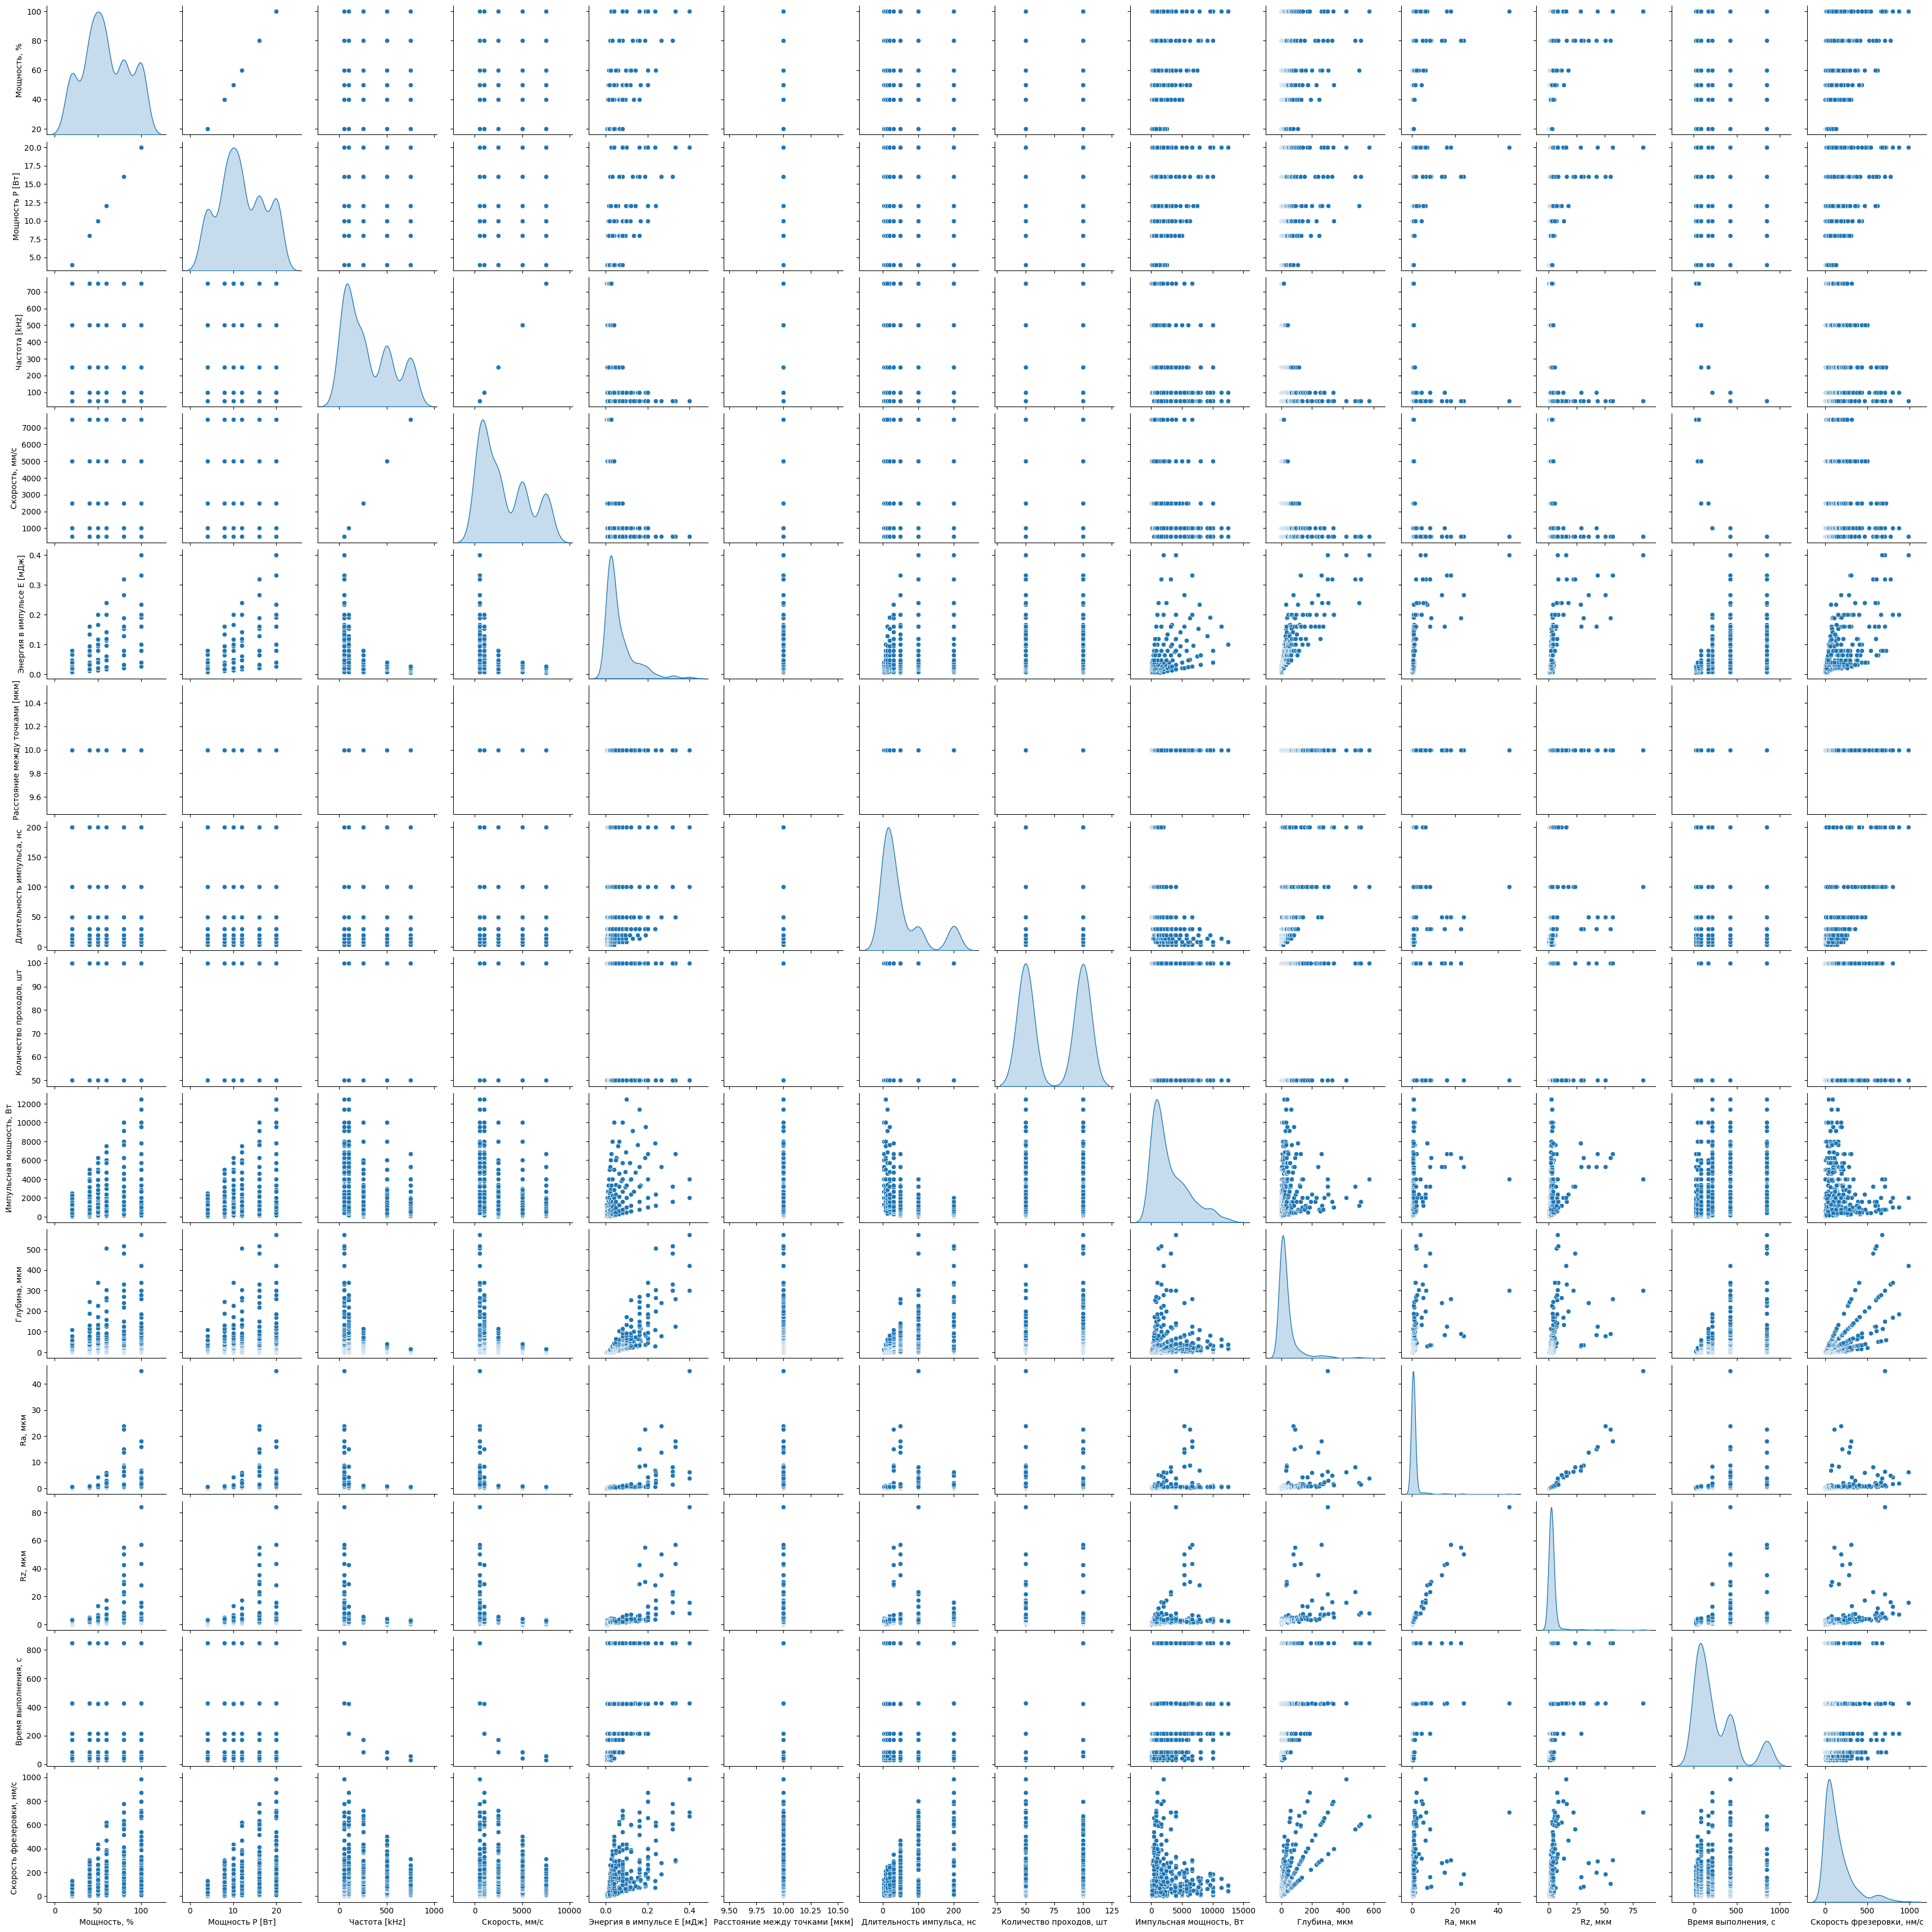

In [11]:
#Парные графики
plt.figure(figsize=(1, 1))
sns.pairplot(df, diag_kind='kde')
plt.show()

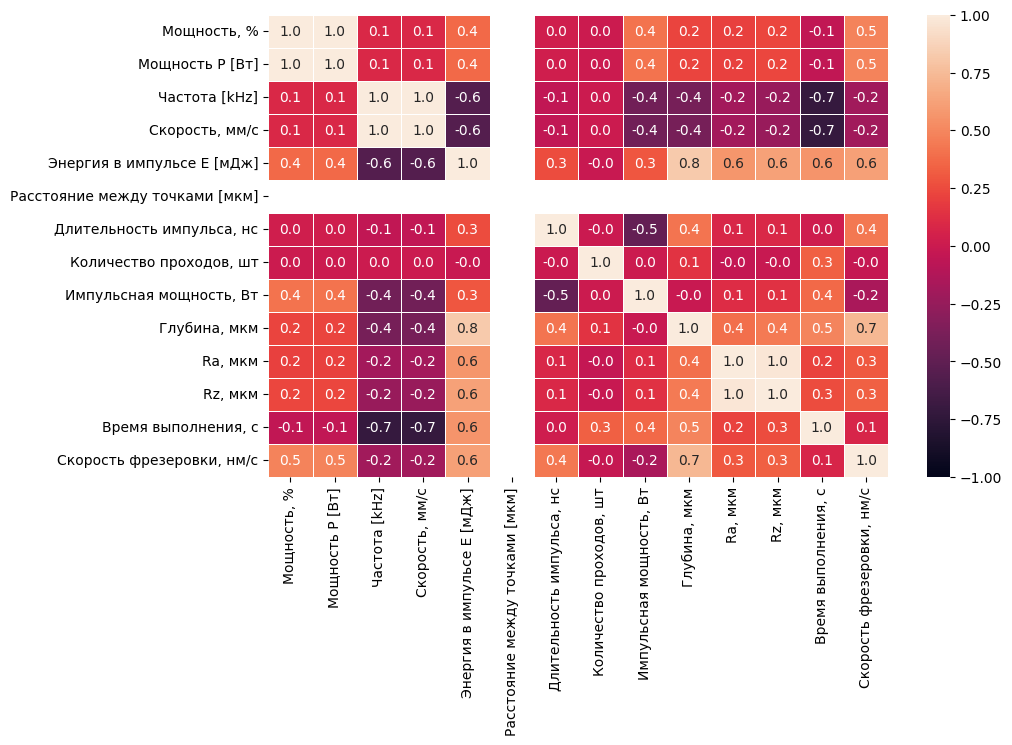

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.1f', linewidth=.5)
plt.show()

In [13]:
#Удаляем столбец "Мощность, %", поскольку он является дублирующим столбца "Мощность Р [Вт]"
# столбец "Расстояние между точками [мкм]", поскольку он содержит фиксированную величину
# и столбец "Частота [kHz]" единично коррелириующий с "Скорость, мм/с"
#Энергия в иммпульсе и

In [14]:
df=df.drop(["Мощность, %", "Расстояние между точками [мкм]","Частота [kHz]", "Rz, мкм"], axis=1)

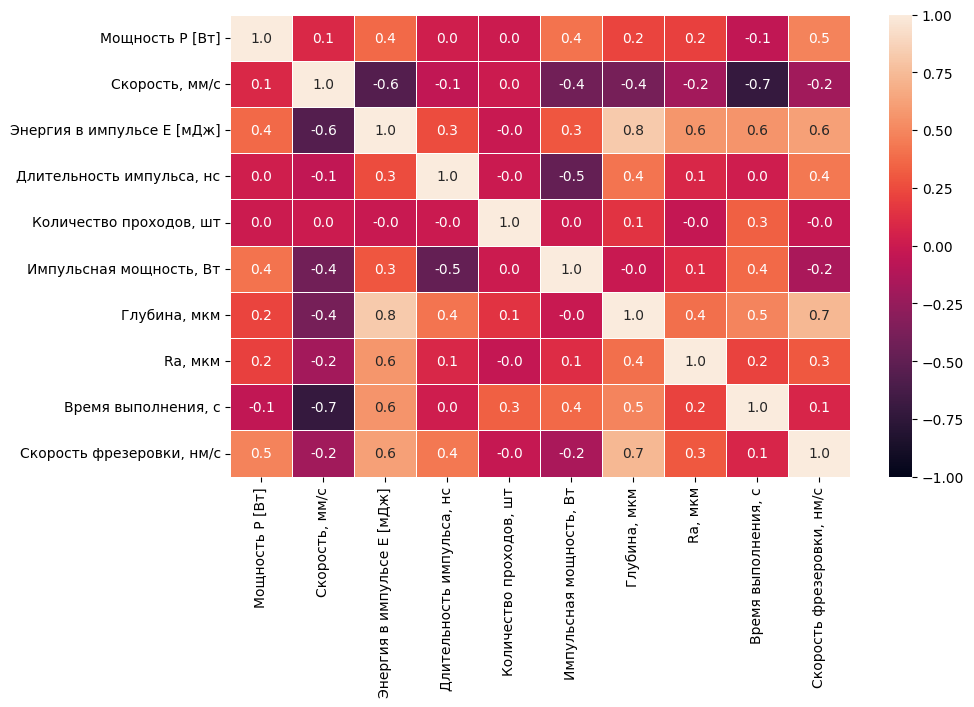

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.1f', linewidth=.5)
plt.show()

Мощность P [Вт]


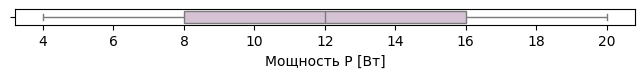

Скорость, мм/с


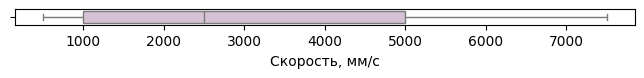

Энергия в импульсе E [мДж]


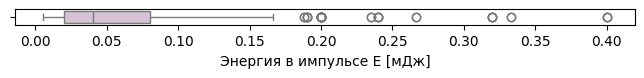

Длительность импульса, нс


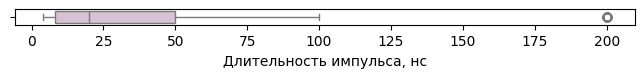

Количество проходов, шт


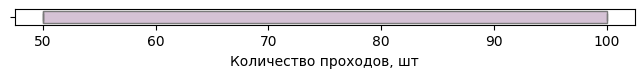

Импульсная мощность, Вт


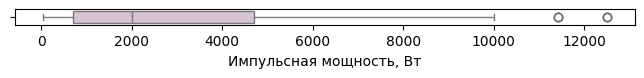

Глубина, мкм


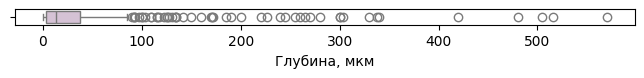

Ra, мкм


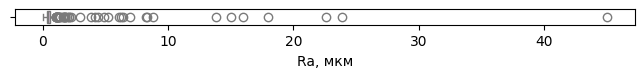

Время выполнения, с


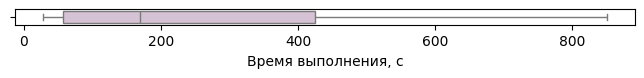

Скорость фрезеровки, нм/с


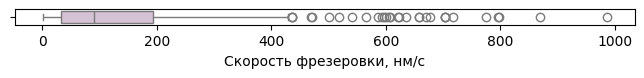

In [16]:
#Диаграммы "Ящики с усами" для идентификации выбросов
for col in df.columns:
    print(col)
    plt.figure(figsize=(8,0.2))
    sub_data = df[col]
    sns.boxplot(x=sub_data, color="thistle");
    plt.show()

In [17]:
df.columns

Index(['Мощность P [Вт]', 'Скорость, мм/с', 'Энергия в импульсе E [мДж]',
       'Длительность импульса, нс', 'Количество проходов, шт',
       'Импульсная мощность, Вт', 'Глубина, мкм', 'Ra, мкм',
       'Время выполнения, с', 'Скорость фрезеровки, нм/с'],
      dtype='object')

In [18]:
#Ищем выбросы
#Метод интерквартильных расстояний для нахождения выбросов
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = Q3 - Q1


df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]


df_clean.shape

(339, 10)

In [19]:
#Метод Z-оценки для нахождения выбросов

from scipy import stats
z = np.abs(stats.zscore(df))


df_clean2 = df[(z<3).all(axis=1)]


df_clean2.shape

(423, 10)

<Axes: ylabel='Density'>

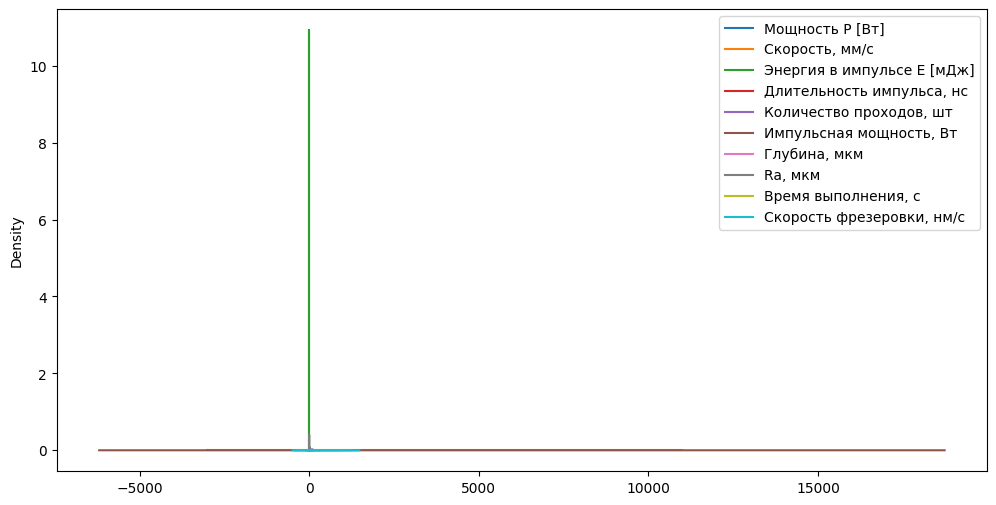

In [20]:
fig, ax = plt.subplots(figsize = (12, 6))
df.plot(kind = 'kde', ax = ax)

<Axes: ylabel='Density'>

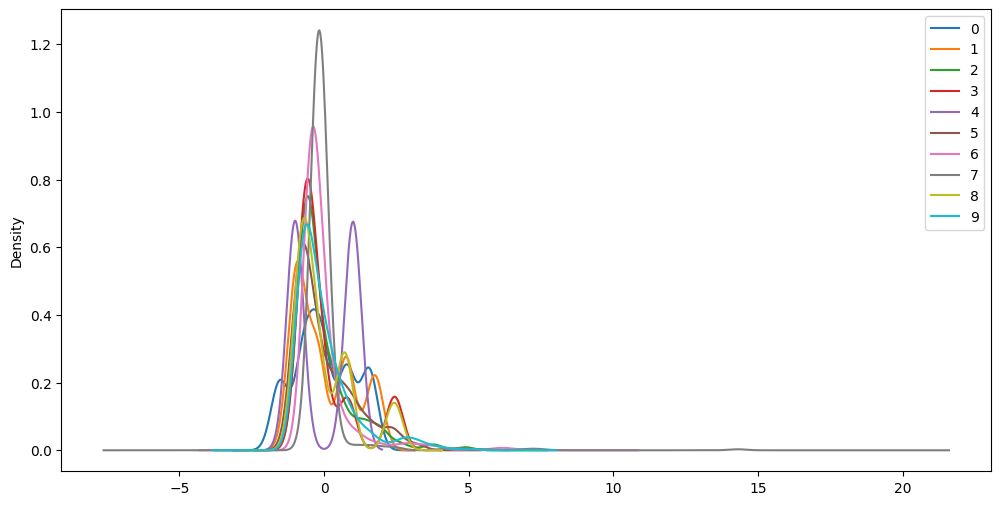

In [21]:
scaller=StandardScaler()
df_norm=pd.DataFrame(scaller.fit_transform(df))
fig, ax = plt.subplots(figsize = (12, 6))
df_norm.plot(kind = 'kde', ax = ax)

Скорость фрезеровки = глубина/время выполнени, по сути - производительность процесса. С технологичесткой точки зрения высокая производительность очень важна, даже в ущерб другим параметрам.
Высокой скорости фрезеровки добиться достаточно сложно, поэтому таких экспериментов сильно меньше. Считаю это достаточным основание не исключать эти значения из выборки.

In [22]:
X=df.copy()
y=X.pop('Ra, мкм')
y=pd.DataFrame(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
data_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
    ])

In [25]:
preprocessor = Pipeline(steps=[("data_transformer_1", data_transformer)])

##StackingRegressor

In [115]:
estimators = [

    ('RandomForestRegressor', make_pipeline(preprocessor, RandomForestRegressor(n_jobs=-1, verbose=True))),
    ('KNRegressor', make_pipeline(preprocessor, KNeighborsRegressor())),
   ('SVR', make_pipeline(preprocessor, PCA(), SVR()))
]

Staking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator= LinearRegression(),
    n_jobs=-1,
    verbose=True
)

In [118]:
regressor_pipeline = Pipeline(
    steps=[('regressor', Staking_regressor)]
)
regressor_pipeline.fit(X_train, y_train.values.ravel())

preds = regressor_pipeline.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, preds),
      "R2: ", r2_score(y_test, preds))

MAE:  0.8065546747521031 R2:  0.3567885481156149


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [87]:
regressor_pipeline

Pipeline(steps=[('regressor',
                 StackingRegressor(estimators=[('RandomForestRegressor',
                                                Pipeline(steps=[('pipeline',
                                                                 Pipeline(steps=[('data_transformer_1',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]))])),
                                                                ('randomforestregressor',
                                                                 RandomForestRegressor(n_jobs=-1,
                                                                                       verbose=True))])),
                                               ('KNRegressor',
                                                Pipeline(steps=[('pipeline',
                                                                 Pipeline(steps=[('data_transform...
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]))])),
                                                                ('kneighborsregressor',
                                                                 KNeighborsRegressor(metric='euclidean'))])),
                                               ('SVR',
                                                Pipeline(steps=[('pipeline',
                                                                 Pipeline(steps=[('data_transformer_1',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]))])),
                                                                ('pca', PCA()),
                                                                ('svr',
                                                                 SVR(C=1,
                                                                     degree=2,
                                                                     gamma=0.001,
                                                                     kernel='linear'))]))],
                                   final_estimator=LinearRegression(),
                                   n_jobs=-1, verbose=True))])

###Настройка гиперпараметров

In [79]:
param_grid = {'regressor__KNRegressor__kneighborsregressor__n_neighbors': [5, 15],
              'regressor__KNRegressor__kneighborsregressor__metric': ('euclidean',  'manhattan'),
              'regressor__SVR__svr__kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'regressor__SVR__svr__C': [1,5,10],
              'regressor__SVR__svr__gamma': [0.001, 0.01, 0.1],
              'regressor__SVR__svr__degree': [2, 3],
              }

In [92]:
search = GridSearchCV(regressor_pipeline, param_grid, n_jobs=-1, cv=3, scoring=r2_score)
search.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('regressor',
                                        StackingRegressor(estimators=[('RandomForestRegressor',
                                                                       Pipeline(steps=[('pipeline',
                                                                                        Pipeline(steps=[('data_transformer_1',
                                                                                                         Pipeline(steps=[('scaler',
                                                                                                                          StandardScaler())]))])),
                                                                                       ('randomforestregressor',
                                                                                        RandomForestRegressor(n_jobs=-1,
                                                                                                              verbose=True))])),
                                                                      ('KNRegressor',
                                                                       Pipeline(steps=[('pipeline',
                                                                                        Pipe...
             param_grid={'regressor__KNRegressor__kneighborsregressor__metric': ('euclidean',
                                                                                 'manhattan'),
                         'regressor__KNRegressor__kneighborsregressor__n_neighbors': [5,
                                                                                      15],
                         'regressor__SVR__svr__C': [1, 5, 10],
                         'regressor__SVR__svr__degree': [2, 3],
                         'regressor__SVR__svr__gamma': [0.001, 0.01, 0.1],
                         'regressor__SVR__svr__kernel': ('linear', 'poly',
                                                         'rbf', 'sigmoid')},
             scoring=<function r2_score at 0x7de9d6ff4b80>)

In [94]:
#Фиксируем наилучшие параметры
search.best_params_

{'regressor__KNRegressor__kneighborsregressor__metric': 'euclidean',
 'regressor__KNRegressor__kneighborsregressor__n_neighbors': 5,
 'regressor__SVR__svr__C': 1,
 'regressor__SVR__svr__degree': 2,
 'regressor__SVR__svr__gamma': 0.001,
 'regressor__SVR__svr__kernel': 'linear'}

In [95]:
search.best_estimator_

Pipeline(steps=[('regressor',
                 StackingRegressor(estimators=[('RandomForestRegressor',
                                                Pipeline(steps=[('pipeline',
                                                                 Pipeline(steps=[('data_transformer_1',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]))])),
                                                                ('randomforestregressor',
                                                                 RandomForestRegressor(n_jobs=-1,
                                                                                       verbose=True))])),
                                               ('KNRegressor',
                                                Pipeline(steps=[('pipeline',
                                                                 Pipeline(steps=[('data_transform...
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]))])),
                                                                ('kneighborsregressor',
                                                                 KNeighborsRegressor(metric='euclidean'))])),
                                               ('SVR',
                                                Pipeline(steps=[('pipeline',
                                                                 Pipeline(steps=[('data_transformer_1',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]))])),
                                                                ('pca', PCA()),
                                                                ('svr',
                                                                 SVR(C=1,
                                                                     degree=2,
                                                                     gamma=0.001,
                                                                     kernel='linear'))]))],
                                   final_estimator=LinearRegression(),
                                   n_jobs=-1, verbose=True))])

In [ ]:
#эта команда была необходима, чтобы корректно ввести estimators
for param in search.get_params().keys():
 print(param)

In [112]:
#вводим наилучшые параметры
estimators_best_params = [

    ('RandomForestRegressor', make_pipeline(preprocessor, RandomForestRegressor(n_jobs=-1, verbose=True))),
    ('KNRegressor', make_pipeline(preprocessor, KNeighborsRegressor(metric='euclidean', n_neighbors=5))),
    ('SVR', make_pipeline(preprocessor, PCA(), SVR(degree=2, C=1, gamma=0.001, kernel='linear')))
]

Staking_regressor_best_params = StackingRegressor(
    estimators=estimators_best_params,
    final_estimator= LinearRegression(),
    n_jobs=-1,
    verbose=True
)

In [113]:
#Запускаем алгоритм с лучшими параметрами
regressor_pipeline = Pipeline(
    steps=[('regressor', Staking_regressor_best_params)]
)
regressor_pipeline.fit(X_train, (y_train.values.ravel()))

y_pred_best_params = regressor_pipeline.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred_best_params),
      "R2: ", r2_score(y_test, y_pred_best_params))

MAE:  0.7935289523922558 R2:  0.32528000273137037


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


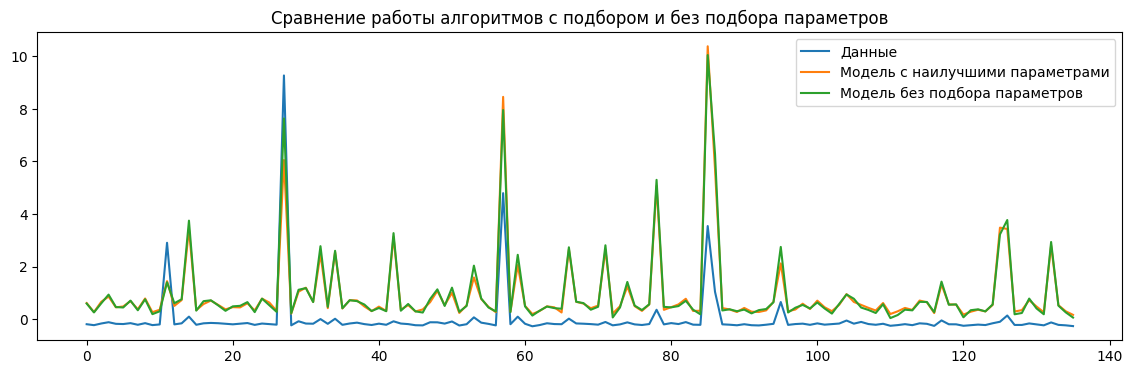

In [120]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(preprocessor.fit_transform(y_test), label='Данные')
ax.plot(y_pred_best_params, label='Модель с наилучшими параметрами')
ax.plot(preds, label='Модель без подбора параметров')
ax.legend()
plt.title("Сравнение работы алгоритмов с подбором и без подбора параметров")
plt.show()

#Посмотрим какую точность покажет каждый алгоритм в отдельности

##LinearRegression

In [127]:
regressor_pipeline_1 = Pipeline(
    steps= [('preprocessor', preprocessor),
            ('regressor', LinearRegression())
            ]
)
regressor_pipeline_1.fit(X_train, y_train.values.ravel())
y_pred_1 = regressor_pipeline_1.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred_1),
      "R2: ", r2_score(y_test, y_pred_1))



MAE:  1.1079689231850045 R2:  0.31213630019129945


NameError: name 'cross_val_score' is not defined

##KNeighborsRegressor

In [34]:
regressor_pipeline_2 = Pipeline(
    steps= [('preprocessor', preprocessor),
            ('regressor', KNeighborsRegressor(metric='euclidean', n_neighbors=5))]
)
regressor_pipeline_2.fit(X_train, y_train)
y_pred_2 = regressor_pipeline_2.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred_2),
      "R2: ", r2_score(y_test, y_pred_2))

MAE:  0.8330147058823529 R2:  0.2785899913233524


##SVR

In [35]:
regressor_pipeline_3 = Pipeline(
    steps= [('regressor', make_pipeline(preprocessor, PCA(), SVR(degree=2, C=1, gamma=0.001, kernel='linear')))] #
)
regressor_pipeline_3.fit(X_train, y_train)
y_pred_3 = regressor_pipeline_3.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred_3),
      "R2: ", r2_score(y_test, y_pred_3))

MAE:  0.8572217271337582 R2:  0.06849925530199974


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##RandomForestRegressor

In [36]:
regressor_pipeline_4 = Pipeline(
    steps= [('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor())]
)
regressor_pipeline_4.fit(X_train, y_train)
y_pred_4 = regressor_pipeline_4.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred_4),
      "R2: ", r2_score(y_test, y_pred_4))

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


MAE:  0.7457345588235295 R2:  0.3966809334145095


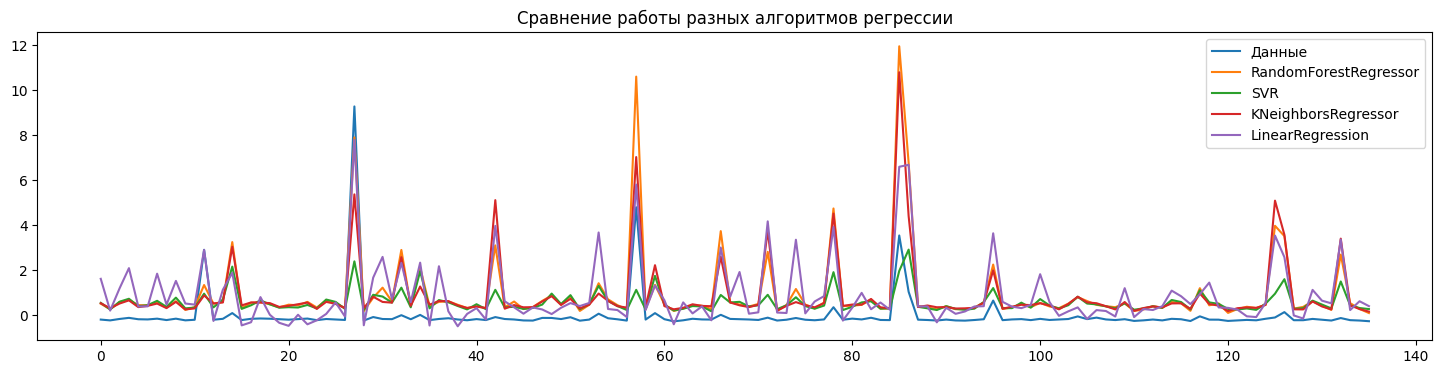

In [37]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(preprocessor.fit_transform(y_test), label='Данные')
ax.plot(y_pred_4, label='RandomForestRegressor')
ax.plot(y_pred_3, label='SVR')
ax.plot(y_pred_2, label='KNeighborsRegressor')
ax.plot(y_pred_1, label='LinearRegression')
ax.legend()
plt.title("Сравнение работы разных алгоритмов регрессии")
plt.show()

##Выведем все полученный ошибки

In [121]:
print("StackingRegressor с базовыми параметрами: "
      "MAE: ", mean_absolute_error(y_test, preds),
      "R2: ", r2_score(y_test, preds))
print("StackingRegressor с наилучшими параметрами: "
      "MAE: ", mean_absolute_error(y_test, y_pred_best_params),
      "R2: ", r2_score(y_test, y_pred_best_params))
print("LinearRegression: "
       "MAE: ", mean_absolute_error(y_test, y_pred_1),
      "R2: ", r2_score(y_test, y_pred_1))
print("KNeighborsRegressor: "
       "MAE: ", mean_absolute_error(y_test, y_pred_2),
      "R2: ", r2_score(y_test, y_pred_2))
print("SVR: "
       "MAE: ", mean_absolute_error(y_test, y_pred_3),
      "R2: ", r2_score(y_test, y_pred_3))
print("RandomForestRegressor: "
       "MAE: ", mean_absolute_error(y_test, y_pred_4),
      "R2: ", r2_score(y_test, y_pred_4))


StackingRegressor с базовыми параметрами: MAE:  0.8065546747521031 R2:  0.3567885481156149
StackingRegressor с наилучшими параметрами: MAE:  0.7935289523922558 R2:  0.32528000273137037
LinearRegression: MAE:  1.1079689231850045 R2:  0.31213630019129945
KNeighborsRegressor: MAE:  0.8330147058823529 R2:  0.2785899913233524
SVR: MAE:  0.8572217271337582 R2:  0.06849925530199974
RandomForestRegressor: MAE:  0.7457345588235295 R2:  0.3966809334145095


#Нейронная сеть



##Модель №1 - для параметра Ra

In [39]:

import keras as kr
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import ReLU, Dropout

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
scaler2 = MinMaxScaler()
X_train_scal = scaler2.fit_transform(X_train)
X_test_scal = scaler2.transform(X_test)
y_train_scal = scaler2.fit_transform(y_train)
y_test_scal = scaler2.transform(y_test)

In [170]:
model_1_1=Sequential()
model_1_1.add(Dense(20, activation='tanh', input_shape=(X_train_scal.shape[1],)))
model_1_1.add(Dense(20, activation='softmax'))
model_1_1.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model_1_1.compile(optimizer=opt, loss='mse',
              metrics=['mae'])

In [129]:
model_1_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                200       
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [168]:
history1 = model_1_1.fit(X_train_scal, y_train_scal, batch_size=2, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
127/127 [==============================] - 1s 4ms/step - loss: 0.0087 - mae: 0.0391 - val_loss: 0.0098 - val_mae: 0.0400
Epoch 2/30
127/127 [==============================] - 0s 2ms/step - loss: 0.0073 - mae: 0.0325 - val_loss: 0.0098 - val_mae: 0.0389
Epoch 3/30
127/127 [==============================] - 0s 2ms/step - loss: 0.0072 - mae: 0.0297 - val_loss: 0.0100 - val_mae: 0.0366
Epoch 4/30
127/127 [==============================] - 0s 2ms/step - loss: 0.0072 - mae: 0.0277 - val_loss: 0.0100 - val_mae: 0.0366
Epoch 5/30
127/127 [==============================] - 0s 2ms/step - loss: 0.0073 - mae: 0.0269 - val_loss: 0.0099 - val_mae: 0.0373
Epoch 6/30
127/127 [==============================] - 0s 2ms/step - loss: 0.0072 - mae: 0.0287 - val_loss: 0.0099 - val_mae: 0.0364
Epoch 7/30
127/127 [==============================] - 0s 2ms/step - loss: 0.0072 - mae: 0.0248 - val_loss: 0.0097 - val_mae: 0.0393
Epoch 8/30
127/127 [==============================] - 0s 2ms/step - loss: 0.

In [169]:
mse, mae = model_1_1.evaluate(X_test_scal, y_test_scal, verbose=1)
print(mae, mse)

5/5 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.0494
0.04938064515590668 0.04336453229188919


In [51]:
y_train.mean()

Ra, мкм    0.858896
dtype: float64

In [52]:
y_pred_1_1 = model_1_1.predict(X_test_scal)

5/5 [==============================] - 0s 2ms/step


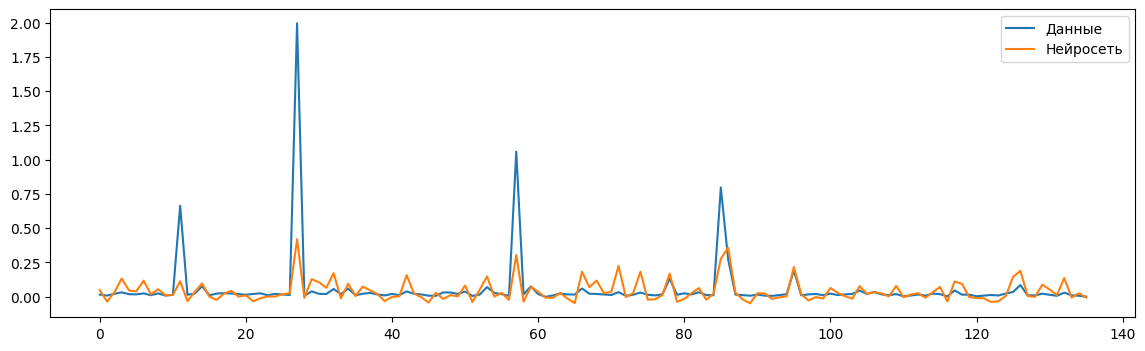

In [165]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_test_scal, label='Данные')
ax.plot(y_pred_1_1, label='Нейросеть')
ax.legend()
plt.show()

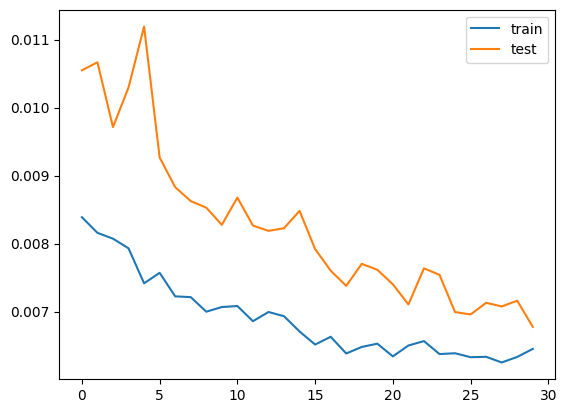

In [166]:

plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show()

##Модель №2 - для параметра Ra

In [137]:
model_1_2 = Sequential()
model_1_2.add(Dense(1, activation='tanh', input_shape=(X_train_scal.shape[1],)))
model_1_2.add(Dropout(0.3))
model_1_2.add(Dense(15, activation='tanh'))
model_1_2.add(Dropout(0.3))
model_1_2.add(Dense(1, activation='linear'))
model_1_2.compile(optimizer='adam', loss='mse',
              metrics=['mae'])

In [ ]:
model_1_2.summary()

In [138]:
history2=model_1_2.fit(X_train_scal, y_train_scal, batch_size=2, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
143/143 [==============================] - 3s 3ms/step - loss: 0.0297 - mae: 0.1016 - val_loss: 0.0155 - val_mae: 0.0554
Epoch 2/20
143/143 [==============================] - 0s 2ms/step - loss: 0.0180 - mae: 0.0763 - val_loss: 0.0156 - val_mae: 0.0427
Epoch 3/20
143/143 [==============================] - 0s 2ms/step - loss: 0.0181 - mae: 0.0755 - val_loss: 0.0171 - val_mae: 0.0489
Epoch 4/20
143/143 [==============================] - 0s 2ms/step - loss: 0.0134 - mae: 0.0624 - val_loss: 0.0165 - val_mae: 0.0455
Epoch 5/20
143/143 [==============================] - 0s 2ms/step - loss: 0.0137 - mae: 0.0601 - val_loss: 0.0158 - val_mae: 0.0453
Epoch 6/20
143/143 [==============================] - 0s 2ms/step - loss: 0.0113 - mae: 0.0575 - val_loss: 0.0163 - val_mae: 0.0434
Epoch 7/20
143/143 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0574 - val_loss: 0.0155 - val_mae: 0.0459
Epoch 8/20
143/143 [==============================] - 0s 2ms/step - loss: 0.

In [139]:
mse, mae = model_1_2.evaluate(X_test_scal, y_test, verbose=1)
print(mae, mse)

5/5 [==============================] - 0s 4ms/step - loss: 23.8397 - mae: 1.2812
1.2812243700027466 23.83972930908203


In [65]:
y_train.mean()

Ra, мкм    0.858896
dtype: float64

In [71]:
y_pred_1_2 = model_1_2.predict(X_test_scal)

5/5 [==============================] - 0s 3ms/step


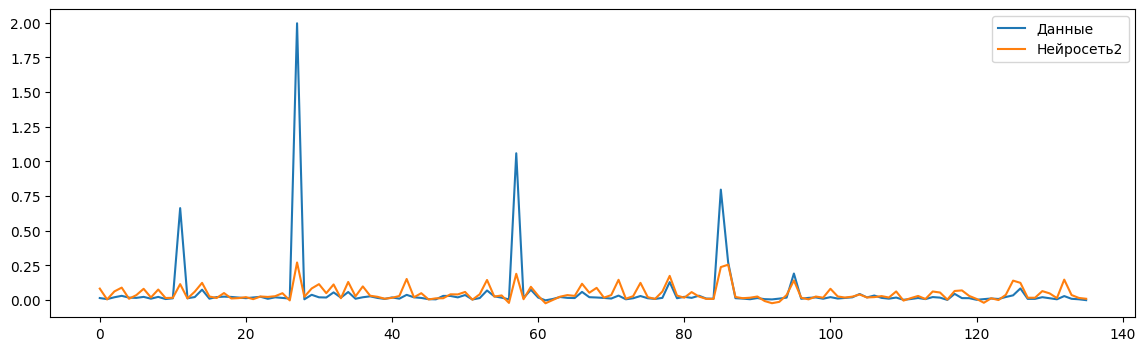

In [77]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(y_test_scal, label='Данные')
ax.plot(y_pred_1_2, label='Нейросеть2')
ax.legend()
plt.show()

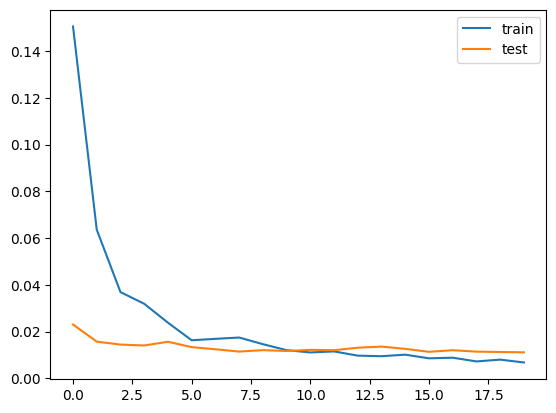

In [78]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
with open("preprocessor.pkl", "wb") as f:
  pickle.dump(preprocessor, f)


In [ ]:
with open("regressor_pipeline_1", "wb") as f:
  pickle.dump(regressor_pipeline_1, f)